In [326]:
# Import all libraries
import tensorflow as tf
import pandas as pd

In [337]:
# Read Dataset
df = pd.read_csv("heart.csv")
df1 = df.copy()
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Preprocessing

In [338]:
# Convert Categorical values into numerical
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df1['Sex']= label_encoder.fit_transform(df1['Sex'])
df1['ChestPainType']= label_encoder.fit_transform(df1['ChestPainType'])
df1['RestingECG']= label_encoder.fit_transform(df1['RestingECG'])
df1['ExerciseAngina']= label_encoder.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope']= label_encoder.fit_transform(df1['ST_Slope'])

df1['Sex'].unique()

array([1, 0])

### Feature Seletion

In [339]:
# Select feature and target
X = df1.drop('HeartDisease',axis=1)
#X = df1[['RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex']]
y = df1['HeartDisease']

### Machine Learning

In [347]:
# Split Data into train and test test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3 , random_state=1)
N, D = X_train.shape

In [348]:
# Standardise data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [349]:
# Build Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D,)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
)

In [350]:
# Train Model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 0.8505 - accuracy: 0.4688 - val_loss: 0.8882 - val_accuracy: 0.4420
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.8186 - accuracy: 0.4907 - val_loss: 0.8556 - val_accuracy: 0.4710
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7904 - accuracy: 0.5125 - val_loss: 0.8242 - val_accuracy: 0.5000
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7650 - accuracy: 0.5202 - val_loss: 0.7975 - val_accuracy: 0.5072
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7421 - accuracy: 0.5358 - val_loss: 0.7725 - val_accuracy: 0.5290
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.7190 - accuracy: 0.5623 - val_loss: 0.7473 - val_accuracy: 0.5471
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.5841 - val_loss: 0.7251 - val_accuracy: 0.5543
Epoch 8/100


### Model Evaluation

In [351]:
# pring train and test score
print('Train score: ',model.evaluate(X_train, y_train))
print('Test score: ',model.evaluate(X_test, y_test))

21/21 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 0.8380
Train score:  [0.3683301508426666, 0.8380062580108643]
9/9 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8514
Test score:  [0.37014833092689514, 0.8514492511749268]


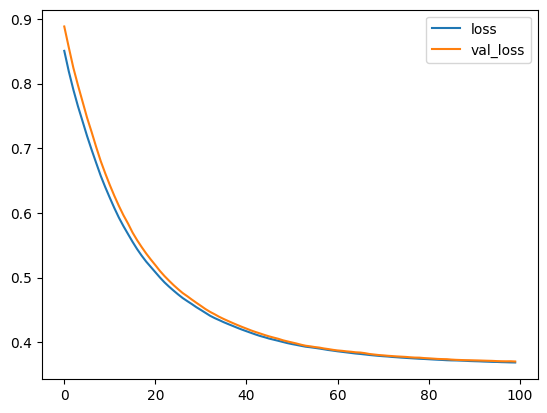

In [352]:
# Plot loss with epochs
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

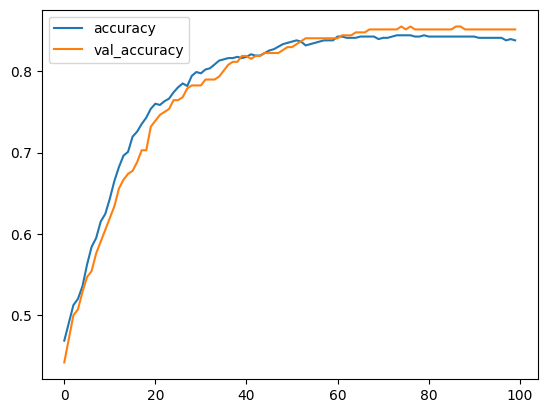

In [353]:
# Plot accuracy with epochs
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'], label ='val_accuracy')
plt.legend()
